## StatsModel : Python에서 통계 관련 함수와 모델링 기법을 제공하는 모듈이다.

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [184]:
plt.rc('figure',figsize=(15,7))
plt.rc('font',size=12)

## 데이터 정보 확인 및 데이터 가져오기

1. train : 3년치의 태양광 발전량 데이터
2. 30분마다 태양광 발전량 계측 -> 하루에 48개의 데이터가 존재

In [75]:
df = pd.read_csv('./train/train.csv')
df.head() 

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0


In [347]:
df2 = df[0:48]
df2

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,Datetime,Date
0,0,0,0,0,0,1.5,69.08,-12,0.000000,2010-01-01 00:00:00,2010-01-01
1,0,0,30,0,0,1.5,69.06,-12,0.000000,2010-01-01 00:30:00,2010-01-01
2,0,1,0,0,0,1.6,71.78,-12,0.000000,2010-01-01 01:00:00,2010-01-01
3,0,1,30,0,0,1.6,71.75,-12,0.000000,2010-01-01 01:30:00,2010-01-01
4,0,2,0,0,0,1.6,75.20,-12,0.000000,2010-01-01 02:00:00,2010-01-01
5,0,2,30,0,0,1.5,69.29,-11,0.000000,2010-01-01 02:30:00,2010-01-01
6,0,3,0,0,0,1.5,72.56,-11,0.000000,2010-01-01 03:00:00,2010-01-01
7,0,3,30,0,0,1.4,72.55,-11,0.000000,2010-01-01 03:30:00,2010-01-01
8,0,4,0,0,0,1.3,74.62,-11,0.000000,2010-01-01 04:00:00,2010-01-01
9,0,4,30,0,0,1.3,74.61,-11,0.000000,2010-01-01 04:30:00,2010-01-01


In [346]:
xx = df2[:-6]
yy = df2[-6:]

In [349]:
yy

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,Datetime,Date
42,0,21,0,0,0,1.9,83.46,-9,0.0,2010-01-01 21:00:00,2010-01-01
43,0,21,30,0,0,1.8,83.46,-9,0.0,2010-01-01 21:30:00,2010-01-01
44,0,22,0,0,0,1.8,83.36,-9,0.0,2010-01-01 22:00:00,2010-01-01
45,0,22,30,0,0,1.7,83.36,-9,0.0,2010-01-01 22:30:00,2010-01-01
46,0,23,0,0,0,1.7,90.86,-10,0.0,2010-01-01 23:00:00,2010-01-01
47,0,23,30,0,0,1.6,90.85,-10,0.0,2010-01-01 23:30:00,2010-01-01


In [348]:
xx

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,Datetime,Date
0,0,0,0,0,0,1.5,69.08,-12,0.000000,2010-01-01 00:00:00,2010-01-01
1,0,0,30,0,0,1.5,69.06,-12,0.000000,2010-01-01 00:30:00,2010-01-01
2,0,1,0,0,0,1.6,71.78,-12,0.000000,2010-01-01 01:00:00,2010-01-01
3,0,1,30,0,0,1.6,71.75,-12,0.000000,2010-01-01 01:30:00,2010-01-01
4,0,2,0,0,0,1.6,75.20,-12,0.000000,2010-01-01 02:00:00,2010-01-01
5,0,2,30,0,0,1.5,69.29,-11,0.000000,2010-01-01 02:30:00,2010-01-01
6,0,3,0,0,0,1.5,72.56,-11,0.000000,2010-01-01 03:00:00,2010-01-01
7,0,3,30,0,0,1.4,72.55,-11,0.000000,2010-01-01 03:30:00,2010-01-01
8,0,4,0,0,0,1.3,74.62,-11,0.000000,2010-01-01 04:00:00,2010-01-01
9,0,4,30,0,0,1.3,74.61,-11,0.000000,2010-01-01 04:30:00,2010-01-01


## Datetime index 생성
1. 날짜와 시간을 함께 표기한 index 생성
2. 날짜만 표기한 index 생성

In [76]:
datetimes = []
dates = []

for i in range(len(df)):
    t = datetime.time(df.Hour[i], df.Minute[i], 0) # Hour와 Minute의 값을 더해서 시간(HH:MM:Ss)으로 표시
    d = datetime.date(2010, 1, 1) + datetime.timedelta(int(df['Day'][i])) # 초기값(2010-01-01)에 날짜 더해서 새로운 날짜 생성
    datetimes.append(datetime.datetime.combine(d, t)) # 날짜 데이터와 시간 데이터를 합침
    dates.append(d)
    
df['Datetime'] = datetimes # 1. 날짜와 시간을 함께 표기한 Column 생성
df['Date'] = dates # 2. 날짜만 표기한 Column 생성

## 단변량 연산 데이터 생성

In [77]:
df_datetime = df[['Datetime', 'TARGET']] # Datetime과 Target값만 가지는 데이터프레임 생성
df_datetime = df_datetime.set_index('Datetime') # Datetime을 인덱스로 사용

df_date = df[['Date', 'TARGET']] # Date Target값만 가지는 데이터프레임 생성

## 단변량 연산 데이터의 특징 및 정상성 확인
1. time plot(시간그래프) - 1일, 1년단위의 계절성 확인
2. 평균, 분산 데이터 확인 - 관측 시점에 따라 평균과 분산이 일정하지 않음
3. seasonal_decompose 분해 -  덧셈분해, 곱셈분해 
4. STL 분해

<AxesSubplot:xlabel='Datetime'>

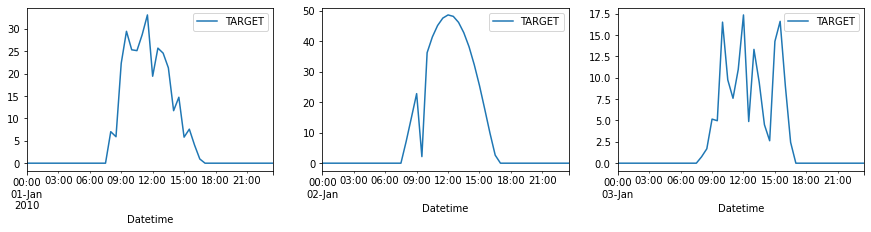

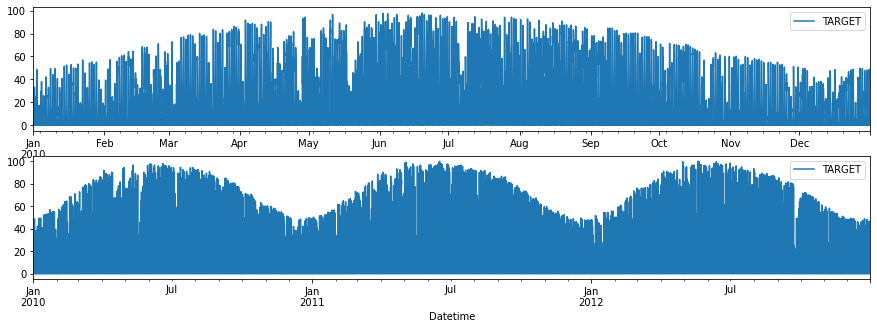

In [78]:
a_day = 48
one_year = a_day*365
df_datetime_oneyear = df_datetime[0:one_year]

fig, axes = plt.subplots(1,3, figsize=(15,3))
df_datetime[0:a_day].plot(ax=axes[0]) # 하루치 데이터의 시간그래프
df_datetime[a_day:a_day*2].plot(ax=axes[1]) # 하루치 데이터의 시간그래프
df_datetime[a_day*2:a_day*3].plot(ax=axes[2]) # 하루치 데이터의 시간그래프

fig2, axes2 = plt.subplots(2,1, figsize=(15,5))
df_datetime_oneyear.plot(ax=axes2[0]) # 1년치 데이터의 시간그래프
df_datetime.plot(ax=axes2[1])

In [101]:
print('1월달 태양광 발전량의 평균 : ', df_date_grouped[1:30].describe(include='all').loc['mean'].values)
print('8월달 태양광 발전량의 평균 : ', df_date_grouped[212:242].describe(include='all').loc['mean'].values)
print()
print('1월달 태양광 발전량의 표준편차 : ', df_date_grouped[1:30].describe(include='all').loc['mean'].values)
print('8월달 태양광 발전량의 표준편차 : ', df_date_grouped[240:270].describe(include='all').loc['mean'].values)

1월달 태양광 발전량의 평균 :  [438.73205776]
8월달 태양광 발전량의 평균 :  [1093.02891732]

1월달 태양광 발전량의 표준편차 :  [438.73205776]
8월달 태양광 발전량의 표준편차 :  [1047.30553678]


In [173]:
df_date_idx = df_date.set_index('Date')
df_date_idx = df_date_idx.sort_index()

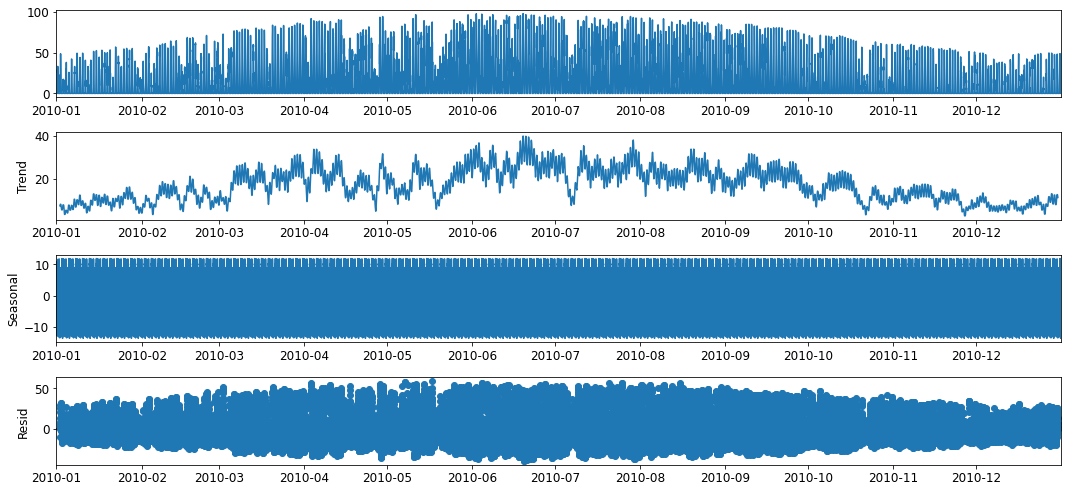

In [204]:
data_decompose_result = seasonal_decompose(df_datetime_oneyear, model='additive', period=120) 
# period 값에 따라 trend/seasonal 데이터 변화
# period = 데이터 주기 값, 원래 index에서 자동으로 받아와야 하는데 datetime에서 값을 받아오지 못하는 것 같아 별도로 지정
# index를 DatetypeIndex로 별도로 지정을 해주지 않아서 그런것 같음
fig3 = data_decompose_result.plot()

In [178]:
trend = data_decompose_result.trend
seasonal = data_decompose_result.seasonal
residual = data_decompose_result.resid
df_decompose_result = pd.DataFrame({'trend' : trend, 'seasonal' : seasonal, 'residual' : residual})
df_decompose_result[48:96]

,trend,seasonal,residual
Datetime,,,
2010-01-02 00:00:00,NaN,11.677007,NaN
2010-01-02 00:30:00,NaN,10.521748,NaN
2010-01-02 01:00:00,NaN,8.975338,NaN
2010-01-02 01:30:00,NaN,6.671312,NaN
2010-01-02 02:00:00,NaN,5.135575,NaN
2010-01-02 02:30:00,NaN,2.582311,NaN
2010-01-02 03:00:00,NaN,-0.311987,NaN
2010-01-02 03:30:00,NaN,-3.084559,NaN
2010-01-02 04:00:00,NaN,-6.029606,NaN


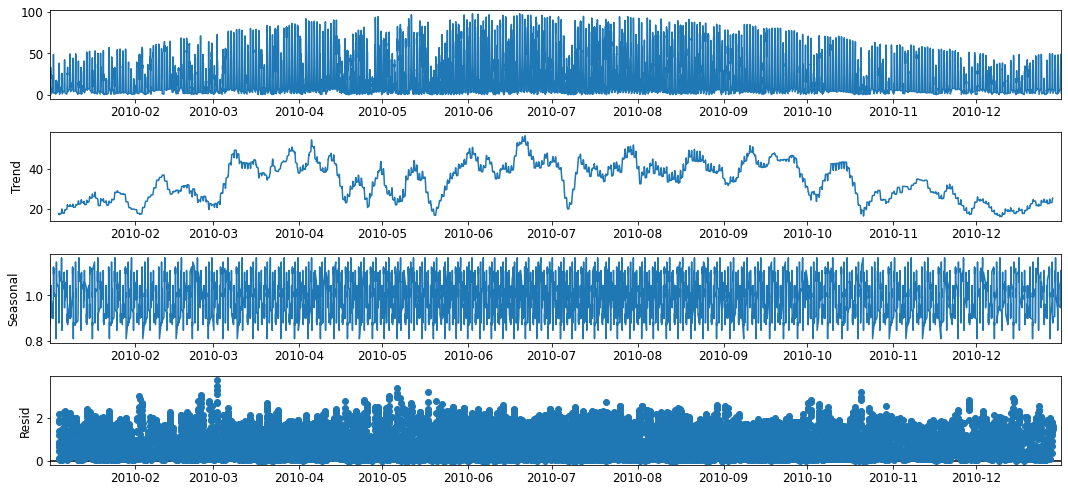

In [205]:
data_decompose_result_mul = seasonal_decompose(df_datetime_oneyear[df_datetime_oneyear.TARGET!=0], model='multiplicative', period=120)
fig4 = data_decompose_result_mul.plot()

In [181]:
trend = data_decompose_result_mul.trend
seasonal = data_decompose_result_mul.seasonal
residual = data_decompose_result_mul.resid
df_decompose_result_mul = pd.DataFrame({'trend' : trend, 'seasonal' : seasonal, 'residual' : residual})
df_decompose_result_mul[48:96]

,trend,seasonal,residual
Datetime,,,
2010-01-03 14:00:00,NaN,1.058878,NaN
2010-01-03 14:30:00,NaN,1.053870,NaN
2010-01-03 15:00:00,NaN,1.029413,NaN
2010-01-03 15:30:00,NaN,1.024409,NaN
2010-01-03 16:00:00,NaN,0.989324,NaN
2010-01-03 16:30:00,NaN,0.973021,NaN
2010-01-04 08:00:00,NaN,0.945269,NaN
2010-01-04 08:30:00,NaN,0.941847,NaN
2010-01-04 09:00:00,NaN,0.949871,NaN


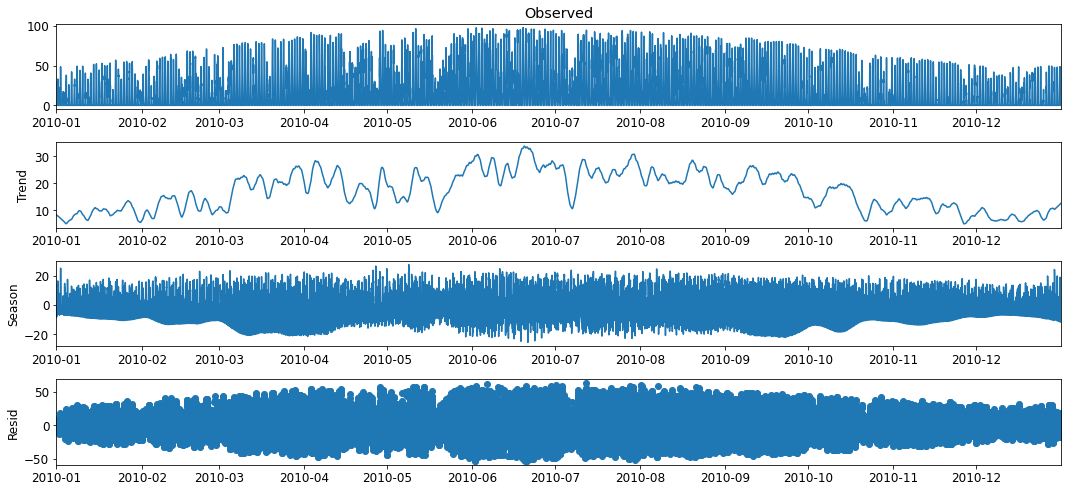

In [206]:
stl = STL(df_datetime_oneyear, period=120)
res = stl.fit()
fig = res.plot()

## 정상화

In [254]:
def plot_rolling(data, interval):
    rol_mean = data.rolling(interval, center=True).mean()
    rol_std = data.rolling(interval, center=True).std()
    return rol_mean, rol_std

rol_mean, rol_std = plot_rolling(df_datetime_oneyear, 48)

In [255]:
rol_mean[0:48]

,TARGET
Datetime,
2010-01-01 00:00:00,NaN
2010-01-01 00:30:00,NaN
2010-01-01 01:00:00,NaN
2010-01-01 01:30:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 02:30:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 03:30:00,NaN
2010-01-01 04:00:00,NaN


No handles with labels found to put in legend.


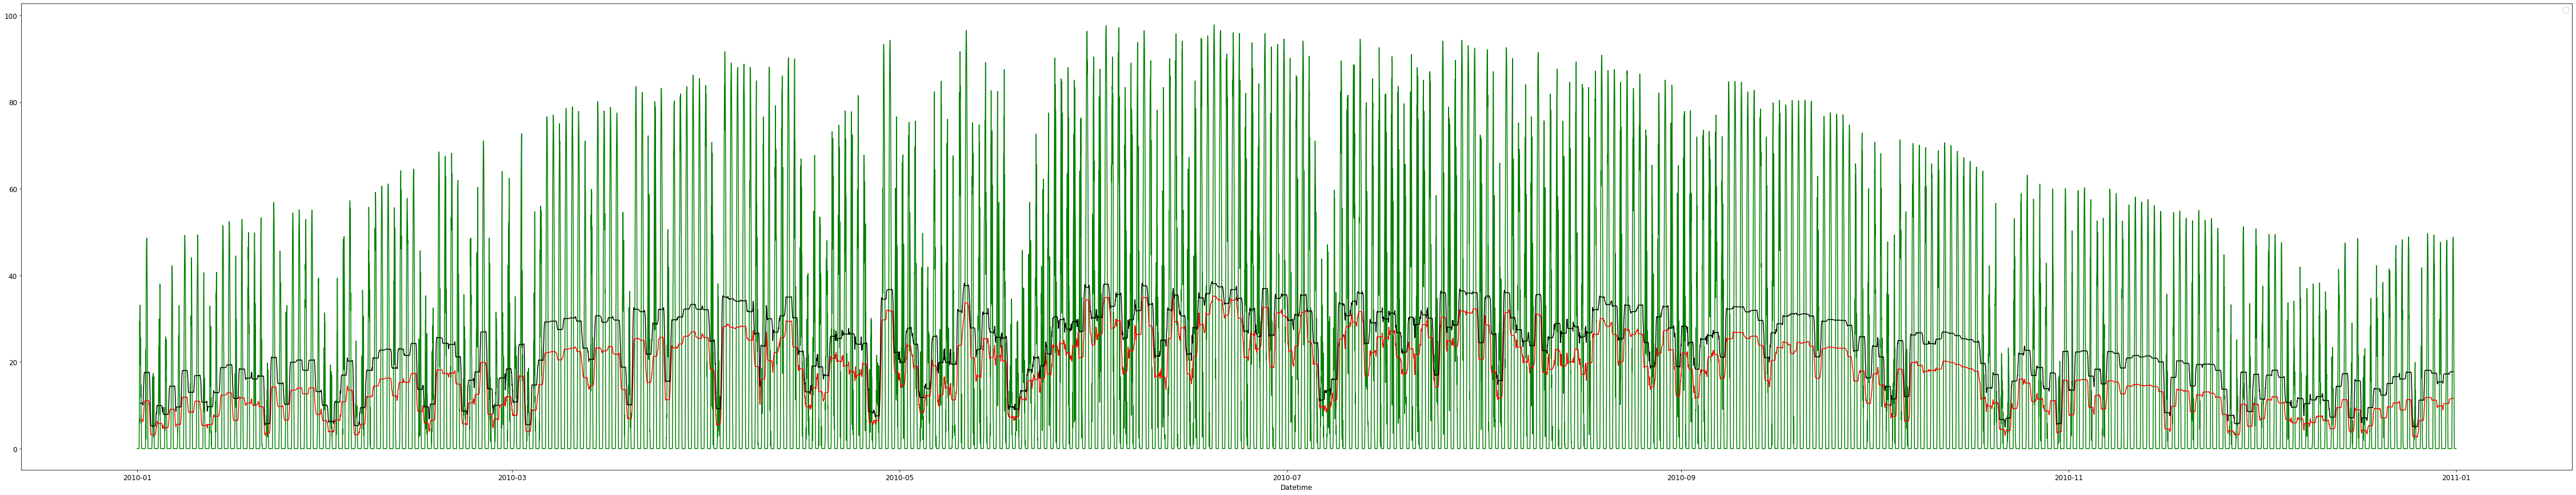

In [256]:
plt.figure(figsize=(80, 15))
plt.xlabel('Datetime')
plt.legend(loc='best')

plt.plot(df_datetime_oneyear, color='green',label='Original')
plt.plot(rol_mean, color='red', label='Rolling Mean')
plt.plot(rol_std, color='black', label = 'Rolling Std')
plt.show()


In [293]:
df_datetime_univariate = df.set_index('Datetime')
df_datetime_univariate = df_datetime_univariate.drop(['Date', 'Day', 'Hour', 'Minute'], axis=1)
df_datetime_univariate[:48]

,DHI,DNI,WS,RH,T,TARGET
Datetime,,,,,,
2010-01-01 00:00:00,0,0,1.5,69.08,-12,0.000000
2010-01-01 00:30:00,0,0,1.5,69.06,-12,0.000000
2010-01-01 01:00:00,0,0,1.6,71.78,-12,0.000000
2010-01-01 01:30:00,0,0,1.6,71.75,-12,0.000000
2010-01-01 02:00:00,0,0,1.6,75.20,-12,0.000000
2010-01-01 02:30:00,0,0,1.5,69.29,-11,0.000000
2010-01-01 03:00:00,0,0,1.5,72.56,-11,0.000000
2010-01-01 03:30:00,0,0,1.4,72.55,-11,0.000000
2010-01-01 04:00:00,0,0,1.3,74.62,-11,0.000000


In [332]:
minmax = MinMaxScaler()
minmax.fit(df_datetime_univariate)
df_datetime_univariate_normalize = pd.DataFrame(minmax.transform(df_datetime_univariate), 
                                                index=df_datetime_univariate.index, columns=df_datetime_univariate.columns)

In [333]:
feature = df_datetime_univariate_normalize.drop('TARGET', axis=1)
label = df_datetime_univariate_normalize['TARGET']

In [339]:
train_feature = feature[:48*300]
train_label = label[:48*300]

test_feature = feature[48*300:]
test_label = label[48*300:]

In [377]:
def make_dataset(data, label, window_size=96):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [378]:
train_feature_arr, train_label_arr = make_dataset(train_feature, train_label, 96)
test_feature_arr, test_label_arr = make_dataset(train_feature, train_label, 96)

In [379]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature_arr, train_label_arr, train_size=0.8, shuffle=False)

In [380]:
x_train.shape

(11443, 96, 5)

In [389]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import os
from sklearn.model_selection import GridSearchCV
from keras.layers import Activation, Dense

In [383]:
param_grid = {
    "batch_size": [10, 16, 32, 40],
    'epochs' :[10, 20, 30, 50, 100]
}

In [384]:
# LSTM
model = Sequential()
model.add(LSTM(16, input_shape=(x_features.shape[1], x_features.shape[2]), activation='relu', return_sequences=False))
model.add(Dense(1))

In [400]:
# MLP

model2 = Sequential()
model2.add(Dense(96, input_shape=(5,)))
model2.add(Dense(48, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1))

In [403]:
losses = ['mse', 'mean_squared_error']
model.compile(loss=losses, optimizer='adam')
model2.compile(loss=losses, optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [405]:
%%time
hist = model2.fit(x_train, y_train, verbose=2, batch_size=16, epochs=50, validation_data=(x_valid, y_valid))
model2_result = model2.evaluate(test_feature_arr, test_label_arr)
pred2 = model2.predict(test_feature_arr)

Epoch 1/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0665
Epoch 2/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0659
Epoch 3/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0683
Epoch 4/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0654
Epoch 5/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0673
Epoch 6/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0672
Epoch 7/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0668
Epoch 8/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0655
Epoch 9/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0660
Epoch 10/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0662
Epoch 11/50
716/716 - 2s - loss: 0.0702 - val_loss: 0.0661
Epoch 12/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0656
Epoch 13/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0660
Epoch 14/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0651
Epoch 15/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0654
Epoch 16/50
716/716 - 2s - loss: 0.0700 - val_loss: 0.0673
Epoch 17/50
716/716 - 2s - loss: 0.0701 - val_loss: 0.0654
Epoch 

In [369]:
%%time
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
history = model.fit(x_train, y_train, verbose=2,
                                    epochs=50, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

In [364]:
model.load_weights(filename)
pred = model.predict(test_feature_arr)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [371]:
model_result = model.evaluate(test_feature_arr, test_label_arr)
model_result

449/449 [==============================] - 1s 3ms/step - loss: 0.0066


0.006570376455783844

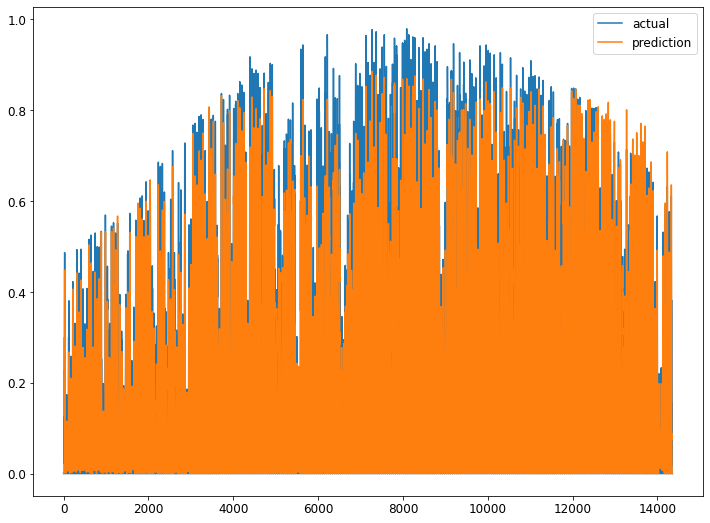

In [366]:
plt.figure(figsize=(12, 9))
plt.plot(test_label_arr, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()